In [734]:
from PIL import Image, ImageFilter, ImageDraw, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from check import *

In [1189]:
img = Image.open('rach.png')

In [1190]:
im = img.convert('L')

In [1191]:
im = im.filter(ImageFilter.SHARPEN)


In [1188]:
im = im.convert('1')

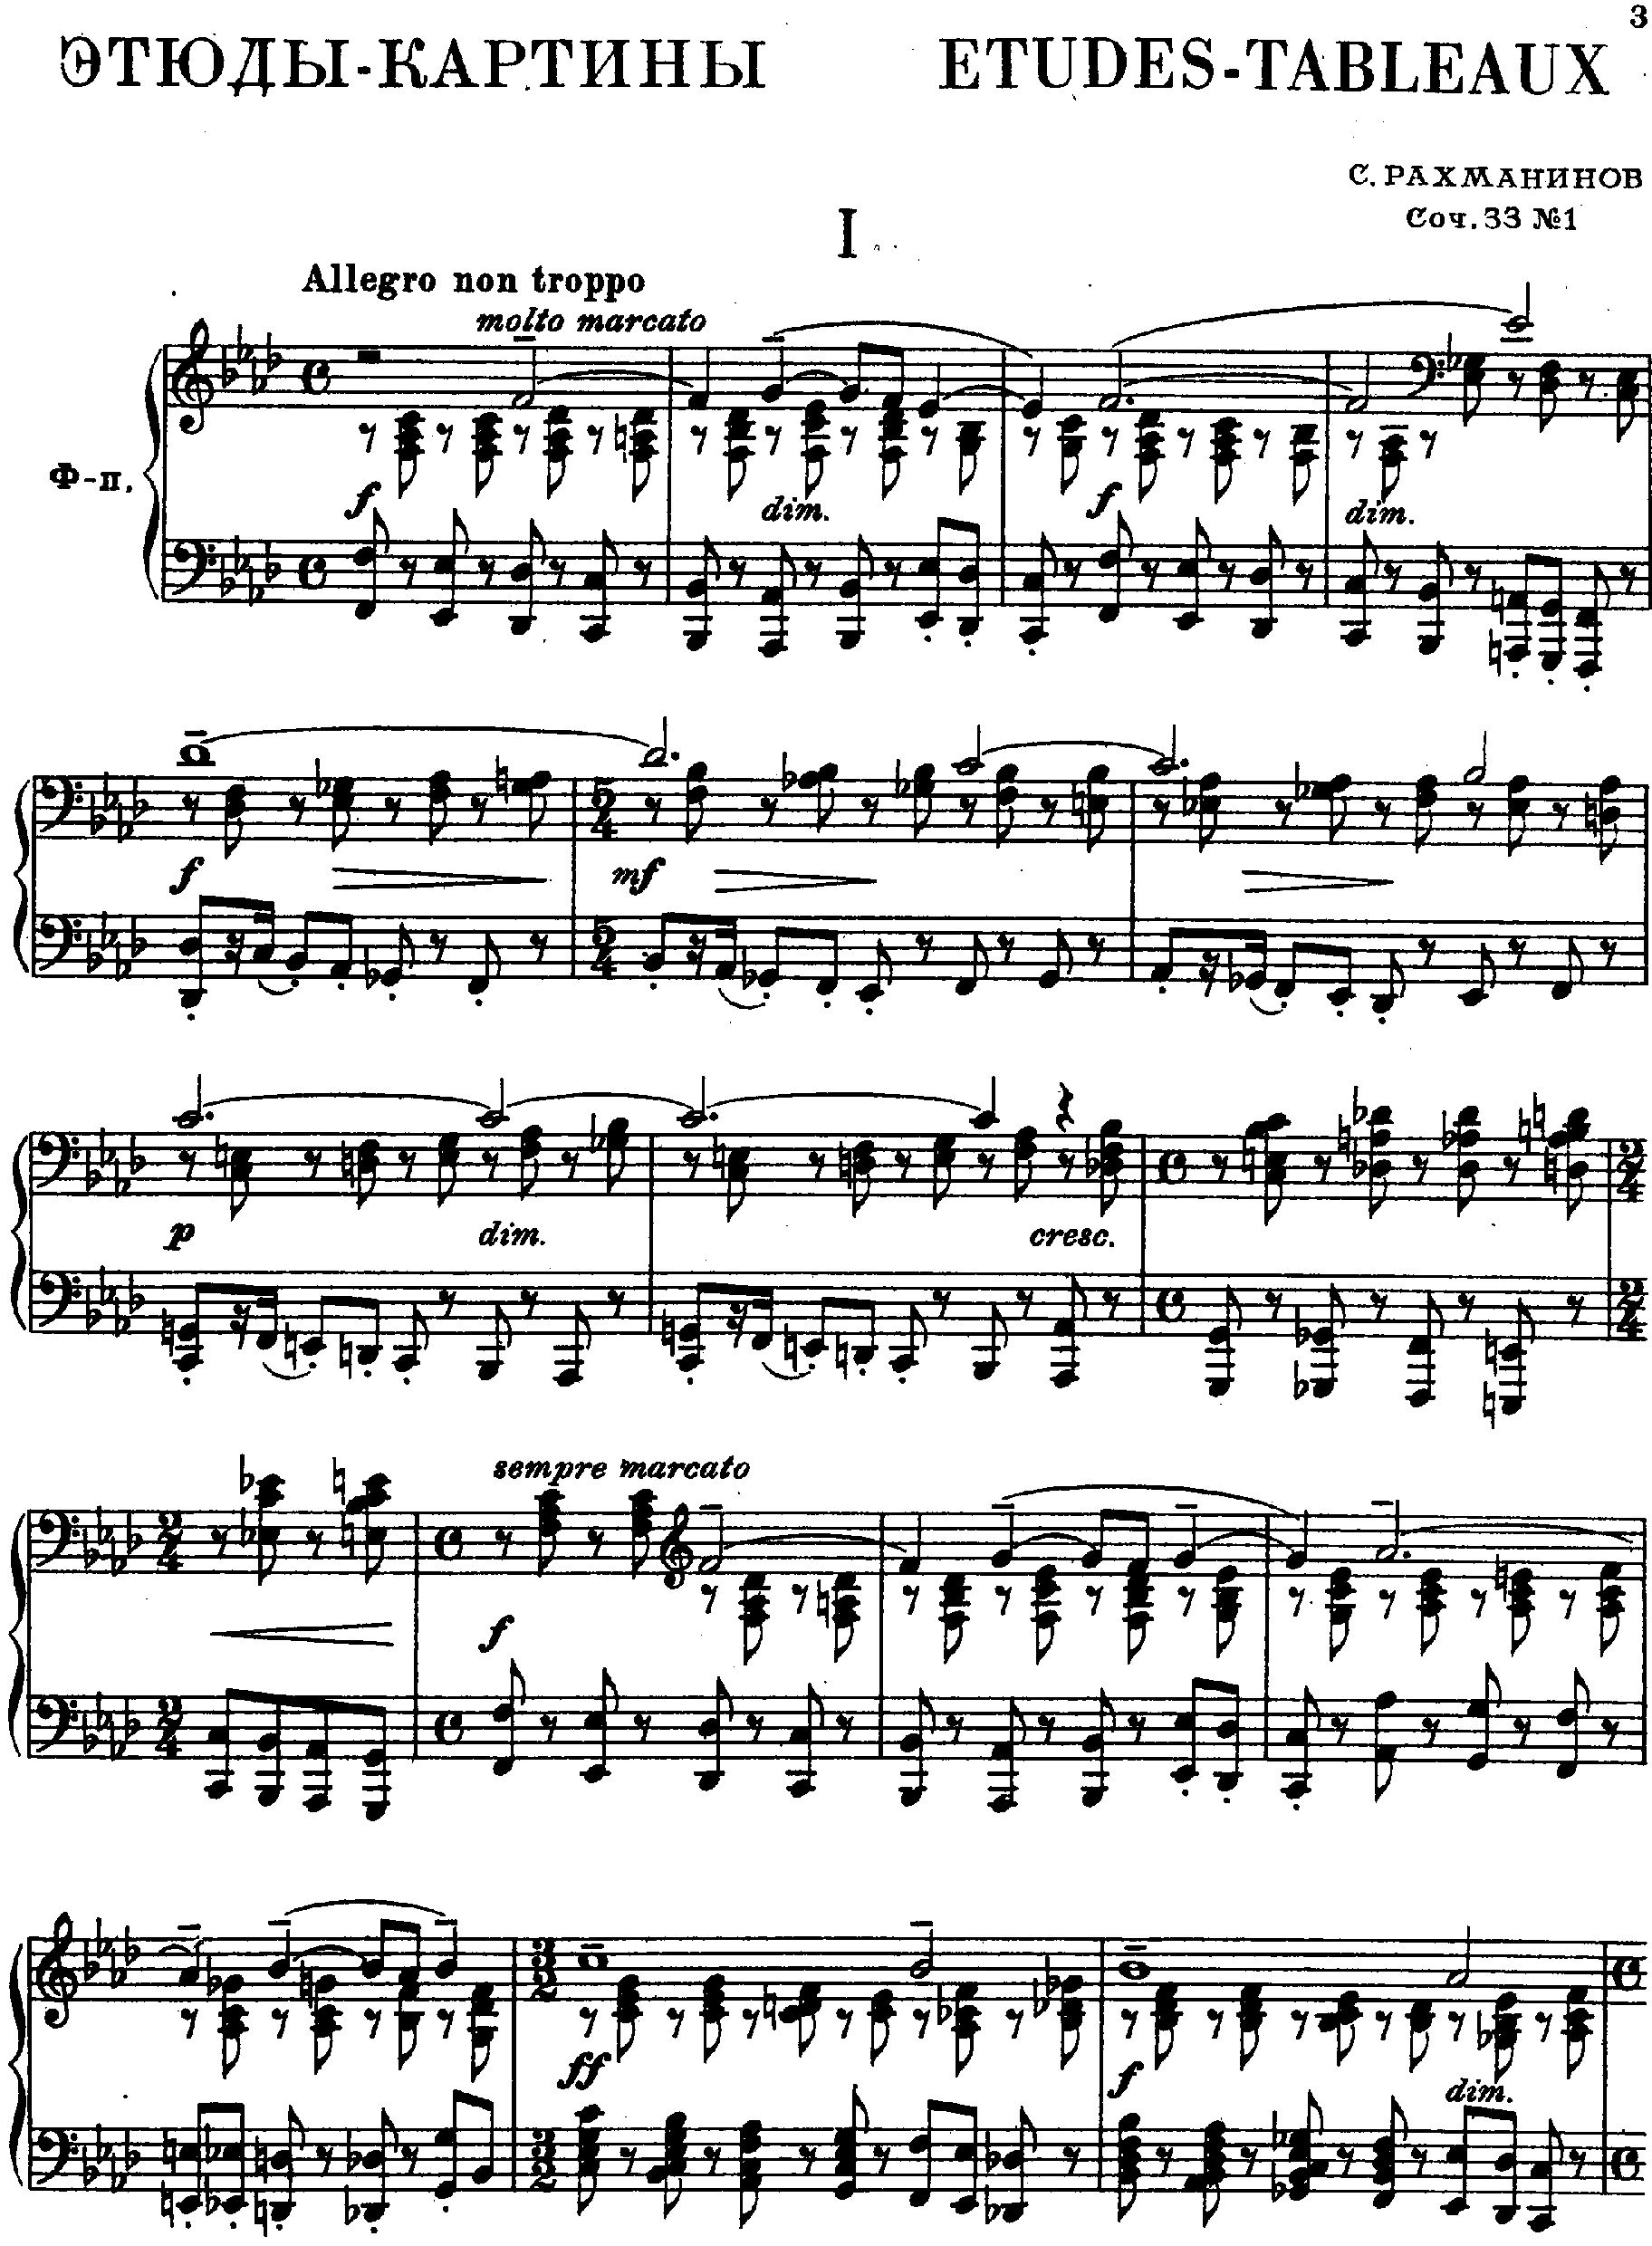

In [1192]:
im

In [1193]:
# ## remove horizontal border lines
# for i in range(im.width):
#     im.putpixel((i,0), 0)
#     im.putpixel((i,im.height-1), 0)

In [1194]:
accumulator = np.zeros(im.height, dtype=np.int16)

In [1195]:
im_ = np.array(im)

In [1196]:
im_

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [1197]:
im_[0][0]

255

In [1161]:
for x in range(im_.shape[0]):
    whites = 0
    blacks = 0
    for y in range(im_.shape[1]):
        if im_[x][y] == False:
            blacks += 1
        else:
            whites +=1
    if(whites < blacks):
        accumulator[x] += 1

In [1198]:
for x in range(im_.shape[0]):
    whites = 0
    blacks = 0
    for y in range(im_.shape[1]):
        if im_[x][y] < 255:
            blacks += 1
        else:
            whites +=1
    if(whites < blacks):
        accumulator[x] += 1

In [1199]:
# accumulator[accumulator > 0]

In [1200]:
accumulator[0]

0

In [1201]:
lines_detected = []

for x in range(im_.shape[0]-1):
    if accumulator[x] == 1 and accumulator[x] !=  accumulator[x+1]:
        lines_detected.append(x)


In [1202]:
lines_detected

[401,
 418,
 434,
 450,
 600,
 619,
 634,
 650,
 666,
 862,
 879,
 895,
 911,
 928,
 1014,
 1030,
 1047,
 1064,
 1080,
 1254,
 1272,
 1288,
 1304,
 1320,
 1406,
 1423,
 1440,
 1456,
 1473,
 1671,
 1689,
 1705,
 1721,
 1738,
 1876,
 1892,
 1909,
 1925,
 1942,
 2142,
 2159,
 2175,
 2192,
 2209,
 2225,
 2352,
 2369,
 2386,
 2402,
 2419]

In [1203]:
lines_detected_10 = []
lines_detected_10.append(lines_detected[0])
for i in range(1, len(sorted(lines_detected))):
    if abs(lines_detected[i] - lines_detected[i-1]) < 8:
        lines_detected_10.append(lines_detected[i-1])
    else:
         lines_detected_10.append(lines_detected[i])

In [1204]:
lines_detected_10 = list(set(lines_detected_10))

In [1205]:
lines_detected_10

[1925,
 1030,
 1671,
 1288,
 650,
 911,
 1423,
 401,
 2192,
 1942,
 1047,
 1304,
 1689,
 666,
 928,
 1440,
 418,
 2209,
 1064,
 1320,
 1705,
 1456,
 2225,
 434,
 2352,
 1080,
 1721,
 2175,
 1473,
 450,
 2369,
 1738,
 2386,
 1876,
 600,
 862,
 2142,
 2402,
 1892,
 1254,
 619,
 879,
 2159,
 2419,
 1909,
 1014,
 1272,
 634,
 1406,
 895]

In [1206]:
img = Image.open('rach.png')
if img.mode == 'L':
    img = img.convert('RGB')
draw = ImageDraw.Draw(img)

for i in range(len(lines_detected_10)):
    x1 = 0
    y1 = lines_detected_10[i]
    x2 = img.width#im_.shape[1]
    y2 = y1
    draw.line((x1, y1, x2, y2), fill=(255, 0, 0), width=2)

img.show()

In [1028]:
img = Image.open('rach.png')
draw = ImageDraw.Draw(img)

for i in range(len(d)):
    x1 = 0
    y1 = d[i]
    x2 = im_.shape[1]
    y2 = y1
    if img.mode == 'L':
        draw.line((x1, y1, x2, y2), fill=(255), width=2)
    else:
        draw.line((x1, y1, x2, y2), fill=(255, 0, 0), width=2)

img.show()

SyntaxError: invalid syntax (748913155.py, line 9)

In [268]:
#distance between lines:
staff = sorted(lines_detected_10)[:5]
diff_sum = 0
for i in range(1, 5):
    diff_sum += staff[i] - staff[i-1]
print(diff_sum/4)

11.5


In [269]:
staff = sorted(lines_detected_10)[5:]
diff_sum = 0
for i in range(1, 5):
    diff_sum += staff[i] - staff[i-1]
print(diff_sum/4)

11.5


In [124]:
img.show()

In [8]:
music = cv.imread('music1.png', cv.COLOR_RGB2GRAY)

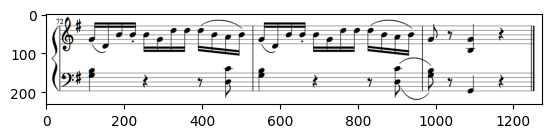

In [9]:
plt.imshow(music)
plt.show()

In [26]:
tmp1 = cv.imread('template1.png', cv.COLOR_RGB2GRAY)

In [27]:
res = cv.matchTemplate(music, tmp1, cv.TM_SQDIFF_NORMED)

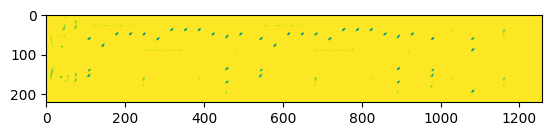

In [28]:
plt.imshow(res)
plt.show()

In [14]:
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

In [ ]:
w = res.shape[1]
h = res.shape[0]